# Complexity test

Empirical test about the logarithm complexity of the size of proofs on the number of transactions.

In [1]:
# Util functions for experiment

from merkle_tree import MerkleTree
from transaction import Transaction

def generate_transactions(num: int) -> list[Transaction]:
    """ Returns a list of transactions of size [num] """
    ret: list[Transaction] = []
    for i in range(num):
        ret.append(Transaction(i))
    return ret

def get_proof_size_for_list_of_transactions(transactions: list[Transaction]) -> int:
    """ Returns the proof size that the Merkle Tree would return for a given list of transactions """
    
    mt = MerkleTree(transactions = transactions)
    proof = mt.proof_for_transaction(transaction = transactions[0])
    return len(proof.operations)


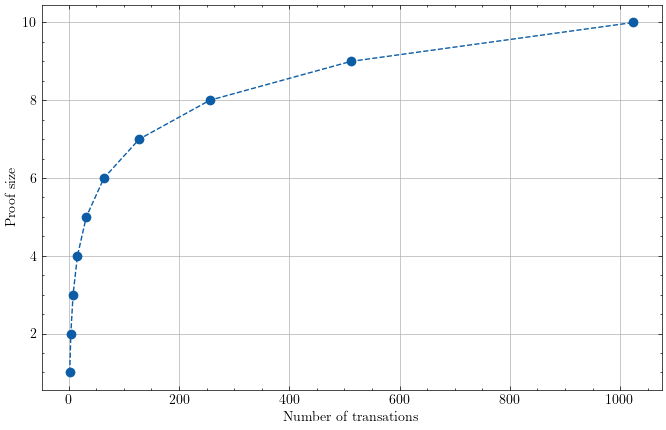

In [11]:
# Run experiments

import matplotlib.pyplot as plt
import scienceplots

with plt.style.context(["science"]):

    plt.figure(figsize=(8, 5))
    number_of_transactions = [2**i for i in range(1, 11)]

    proof_sizes = []

    for num_transactions in number_of_transactions:
        proof_sizes.append(get_proof_size_for_list_of_transactions(generate_transactions(num_transactions)))
    
    plt.plot(number_of_transactions, proof_sizes, linestyle = "--", marker = "o")

    plt.ylabel("Proof size")
    plt.xlabel("Number of transations")
    plt.grid()
    plt.show()
